In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
data = pd.read_csv('DBtrainrides.csv', encoding='UTF-8')

In [123]:
data.head()

,ID,line,path,eva_nr,category,station,state,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,info,arrival_delay_check,departure_delay_check
0,1573967790757085557-2407072312-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.767800,2024-07-08 00:00:00,2024-07-08 00:01:00,2024-07-08 00:03:00,2024-07-08 00:04:00,3,3,NaN,on_time,on_time
1,349781417030375472-2407080017-1,18,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.767800,NaN,2024-07-08 00:17:00,NaN,NaN,0,0,NaN,on_time,on_time
2,7157250219775883918-2407072120-25,1,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...,8000406,4,Aachen-Rothe Erde,Nordrhein-Westfalen,Aachen,52066,6.116475,50.770202,2024-07-08 00:03:00,2024-07-08 00:04:00,2024-07-08 00:03:00,2024-07-08 00:04:00,0,0,NaN,on_time,on_time
3,349781417030375472-2407080017-2,18,Aachen Hbf,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,NaN,NaN,0,0,NaN,on_time,on_time
4,1983158592123451570-2407080010-3,33,Herzogenrath|Kohlscheid,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,2024-07-08 00:20:00,2024-07-08 00:21:00,0,0,NaN,on_time,on_time


In [124]:
data.tail()

,ID,line,path,eva_nr,category,station,state,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,info,arrival_delay_check,departure_delay_check
2061352,-3877986638624297828-2407142237-4,S9,Bottrop Hbf|Bottrop-Boy|Gladbeck West,8002795,5,Herten (Westf),Nordrhein-Westfalen,Herten,45699,7.139053,51.597508,2024-07-14 23:17:00,2024-07-14 23:17:00,NaN,NaN,0,0,NaN,on_time,on_time
2061353,3370285438001482281-2407142234-7,8,Lübeck-Travemünde Strand|Lübeck-Travemünde Haf...,8003775,5,Lübeck-Moisling,Schleswig-Holstein,Lübeck,23560,10.629500,53.836800,2024-07-14 23:10:00,2024-07-14 23:11:00,2024-07-14 23:11:00,2024-07-14 23:12:00,1,1,Information,on_time,on_time
2061354,-8774053210575864323-2407142305-3,80,Bad Oldesloe|Reinfeld(Holst),8003775,5,Lübeck-Moisling,Schleswig-Holstein,Lübeck,23560,10.629500,53.836800,2024-07-14 23:17:00,2024-07-14 23:18:00,2024-07-14 23:17:00,2024-07-14 23:18:00,0,0,Information,on_time,on_time
2061355,-1537118689903044118-2407142354-1,11,NaN,8001580,4,Düsseldorf Flughafen Terminal,Nordrhein-Westfalen,Düsseldorf,40474,6.766979,51.278517,NaN,2024-07-14 23:54:00,NaN,NaN,0,0,Information. (Quelle: zuginfo.nrw),on_time,on_time
2061356,2862161729195150146-2407142324-1,11,NaN,8001580,4,Düsseldorf Flughafen Terminal,Nordrhein-Westfalen,Düsseldorf,40474,6.766979,51.278517,NaN,2024-07-14 23:24:00,NaN,2024-07-14 23:24:00,0,0,Information. (Quelle: zuginfo.nrw),on_time,on_time


In [125]:
np.sum(data.arrival_delay_check == 'on_time')

np.int64(1950404)

In [126]:
data.arrival_delay_m.describe()

count    2.061357e+06
mean     1.176581e+00
std      3.407859e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.590000e+02
Name: arrival_delay_m, dtype: float64

## Data transformation

Changing line type to category

In [127]:
data['line'] = data['line'].astype('category')

Path transformations

In [128]:
def get_path_list(path):
    if pd.isna(path) or path.strip() == '':
        return []
    return path.split('|')

#list of all the stations 
#mb should overwrite path column instead of creating new?
data['path_list'] = data['path'].apply(get_path_list)

In [129]:
#number of stops
data['num_stops'] = data['path_list'].apply(len)

In [130]:
#function to map station to eva number
unmapped_stations = set()

def map_station_to_eva(station_name, station_to_eva_dict):
    if pd.isna(station_name):
        return None
    # Removing text after 'Hbf', keeping 'Hbf' itself
    cleaned = re.sub(r'(Hbf).*', r'\1', station_name)
    cleaned = cleaned.replace('(', ' ').replace(')', ' ')
    cleaned = cleaned.strip()

    return station_to_eva_dict.get(cleaned)

def map_and_track_missing(station_list, station_to_eva_dict):
    mapped = []
    for station in station_list:
        eva = map_station_to_eva(station, station_to_eva_dict)
        if eva is None:
            unmapped_stations.add(station)
        mapped.append(eva)
    return mapped

In [131]:
#mapping the stations to their eva numbers
data['station'] = data['station'].str.replace(r'[()]', '', regex=True)

station_to_eva_rows = data[['station', 'eva_nr']].dropna().drop_duplicates()
station_to_eva_dict = dict(zip(station_to_eva_rows['station'], station_to_eva_rows['eva_nr']))

data['path_eva'] = data['path_list'].apply(lambda station_list: map_and_track_missing(station_list, station_to_eva_dict))

In [132]:
print(f"Nuber of unmapped stations: {len(unmapped_stations)}")
print(f"Some of the unmapped stations are: {list(unmapped_stations)[:5]}")

Nuber of unmapped stations: 4148
Some of the unmapped stations are: ['Neuruppin Rheinsberger Tor', 'Döllstädt', 'Tuttlingen Gänsäcker', 'Lancken', 'Wertheim']


## Data visualization

Number of rows per train line

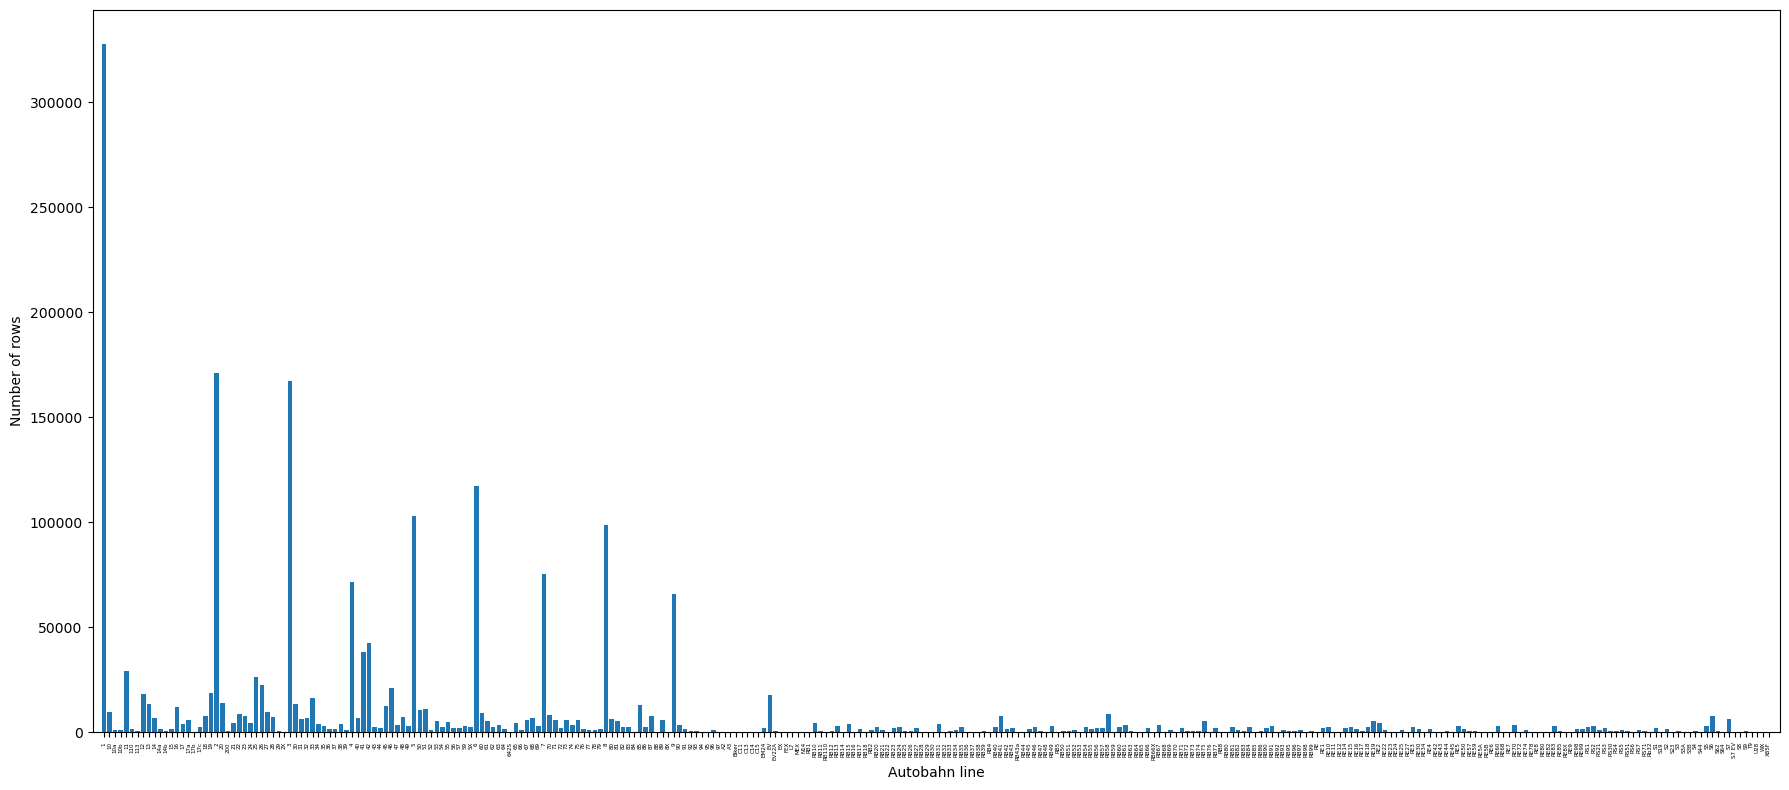

In [166]:
#All
counts = data['line'].value_counts().sort_index()
plt.figure(figsize=(18,8))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Autobahn line")
plt.ylabel("Number of rows")
plt.xticks(rotation=90,fontsize=4)
plt.xlim(-2, len(counts.index) + 1) 
plt.tight_layout()
plt.show()


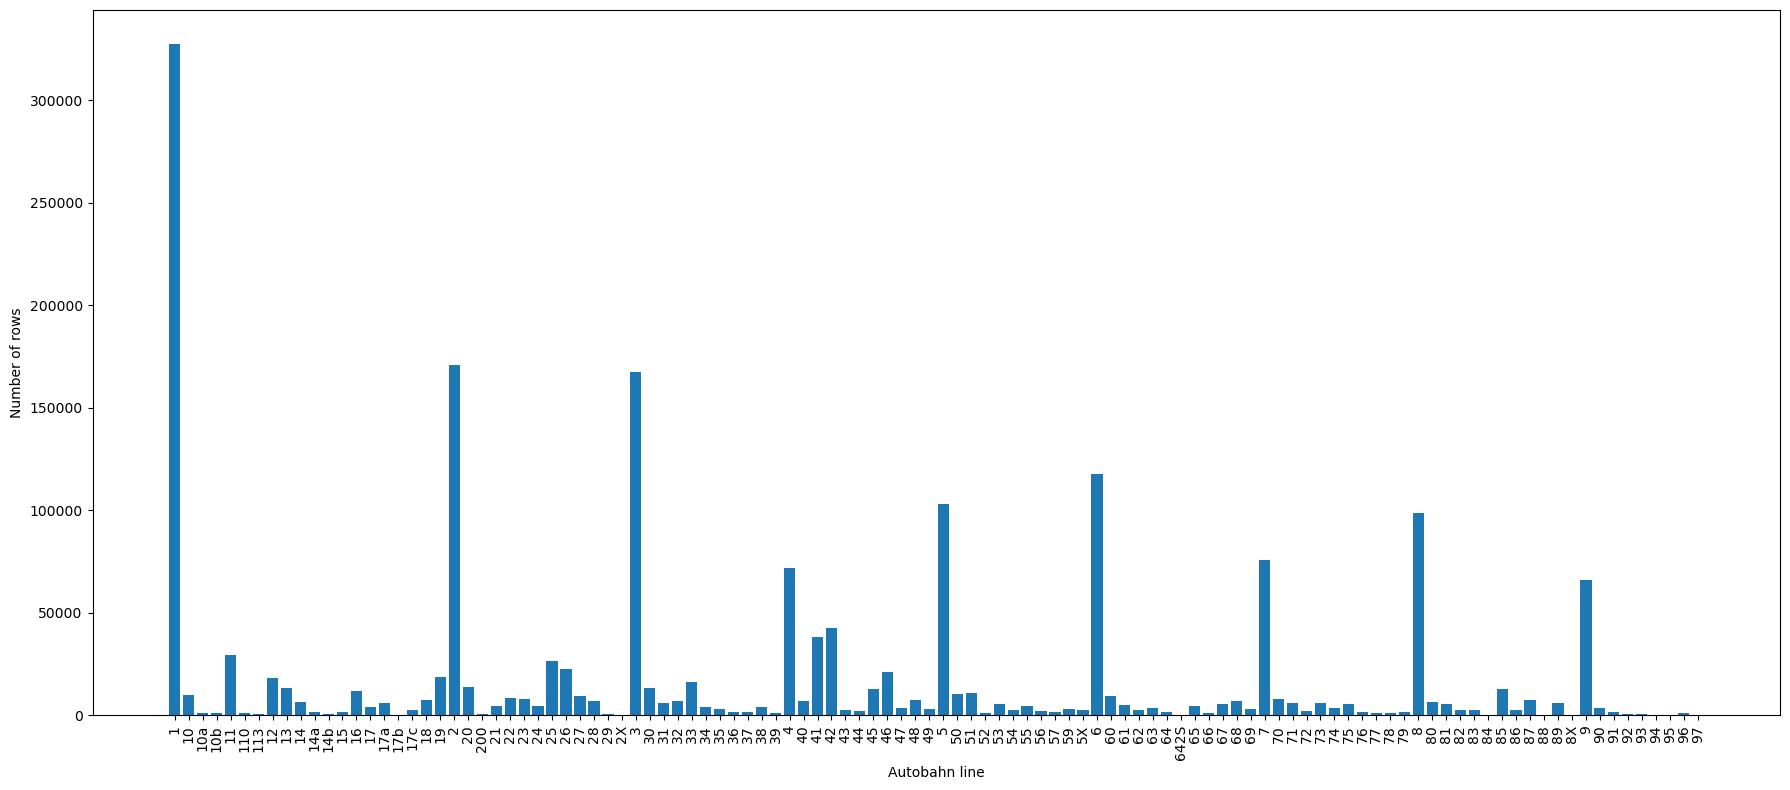

In [160]:
#Lines that start with a number
lines = data['line'].dropna().astype(str)
numeric_lines = lines.str.match(r'^\d+[a-zA-Z]?$')
counts = lines[numeric_lines].value_counts().sort_index()

plt.figure(figsize=(18,8))
plt.bar(counts.index, counts.values)
plt.xlabel("Autobahn line")
plt.ylabel("Number of rows")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

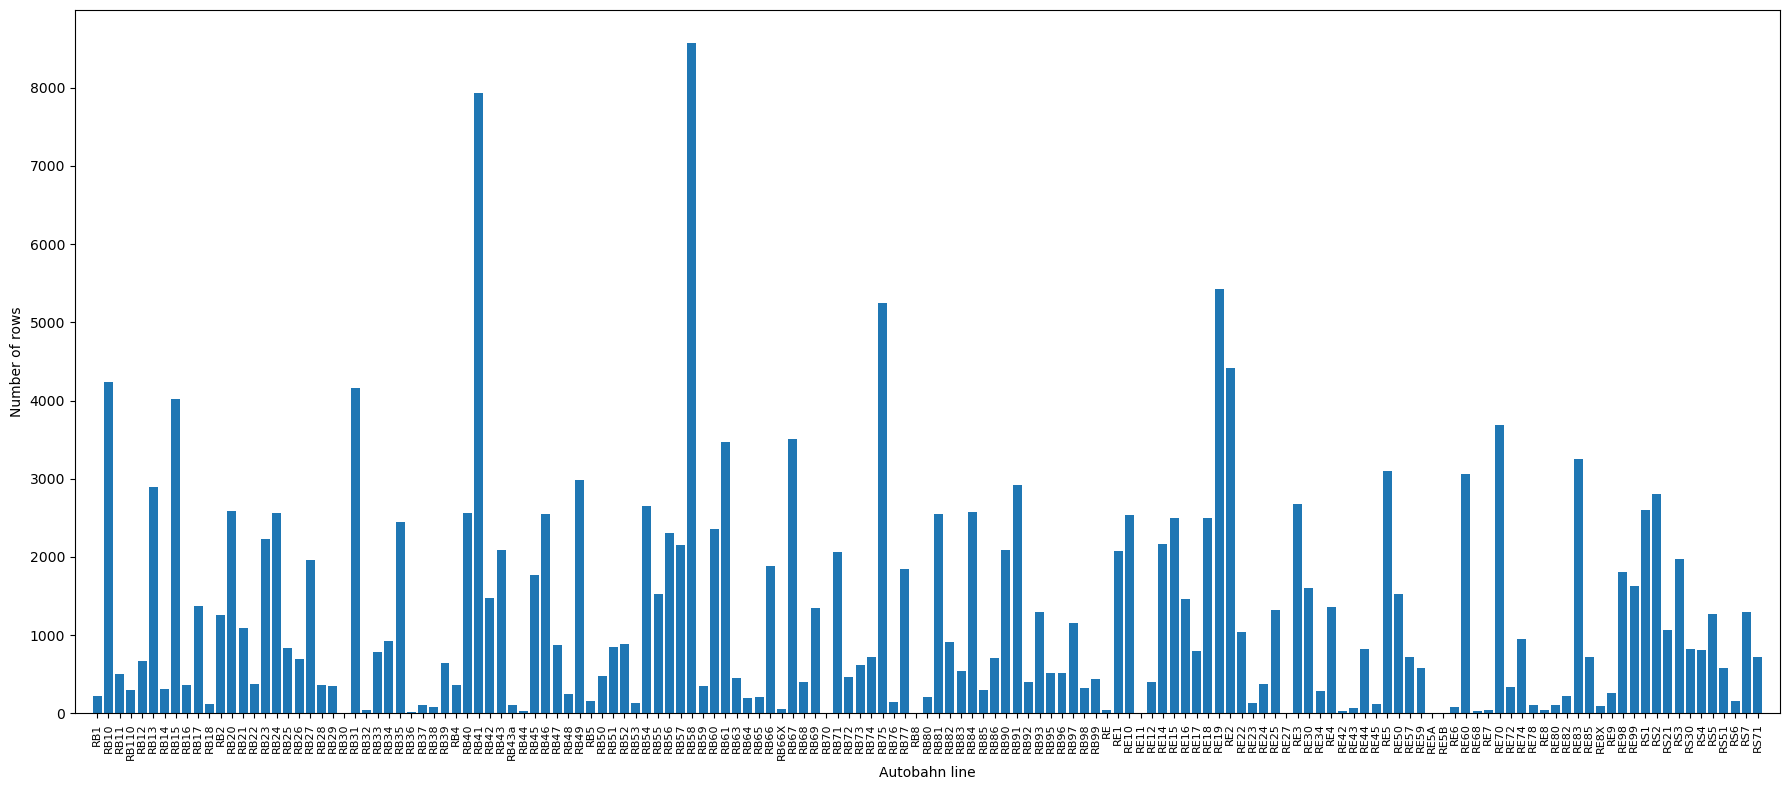

In [161]:
#Lines that start with RB, RS or RE
R_lines = lines.str.match(r'^(RB|RS|RE)')
counts = lines[R_lines].value_counts().sort_index()

plt.figure(figsize=(18,8))
plt.bar(counts.index, counts.values)
plt.xlabel("Autobahn line")
plt.ylabel("Number of rows")
plt.xticks(rotation=90,fontsize=8)
plt.xlim(-2, len(counts.index) + 1) 
plt.tight_layout()
plt.show()

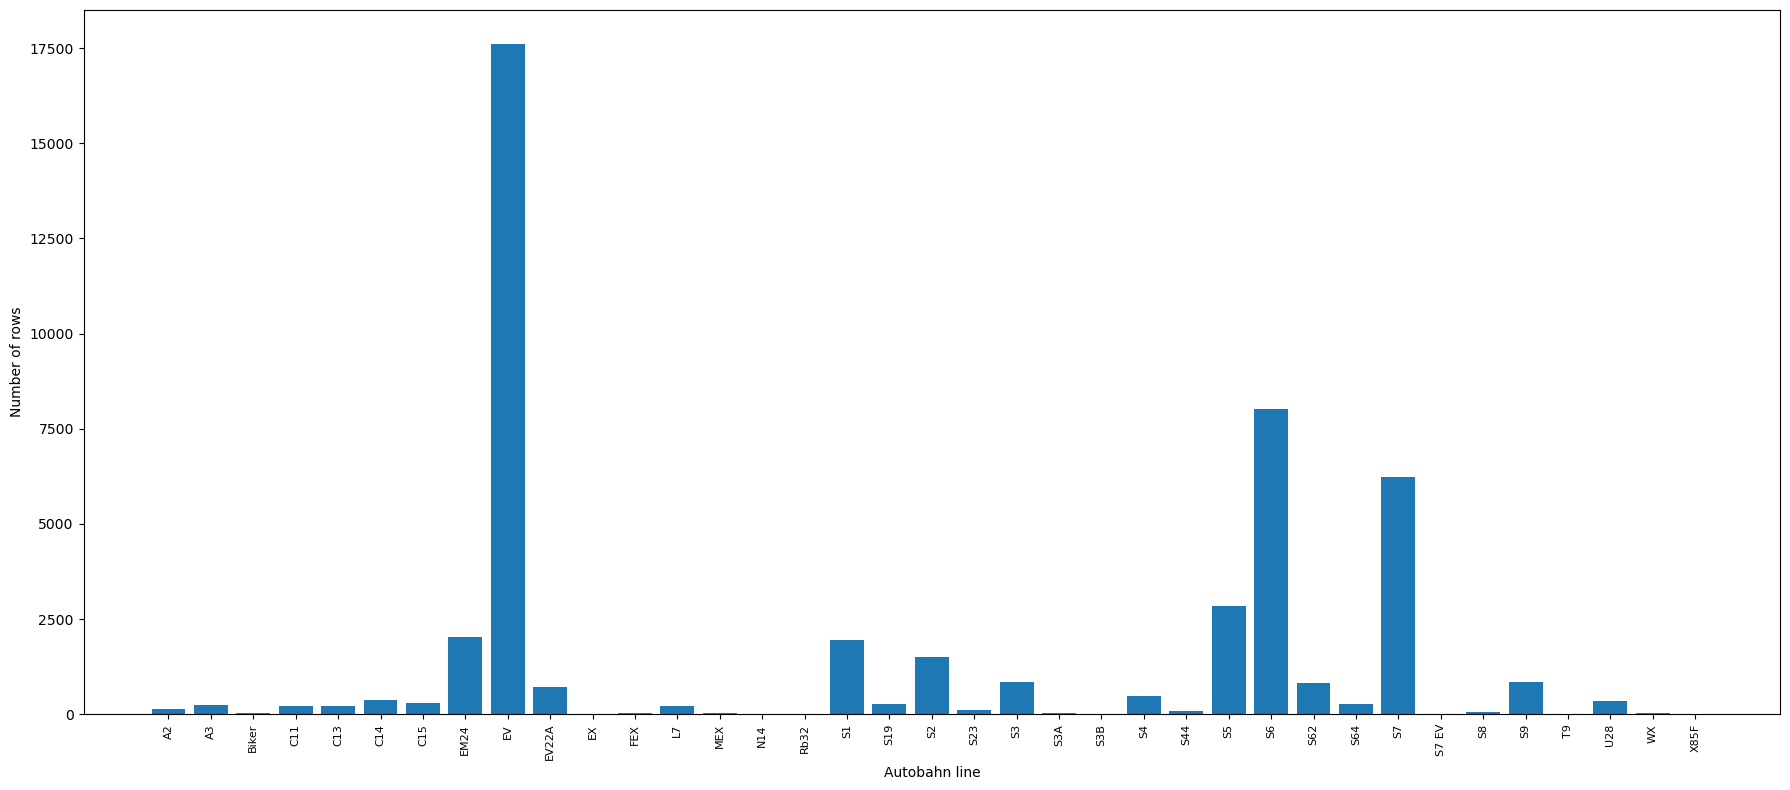

In [162]:
#Lines that don't start with a number nor with RB, RS or RE
counts = lines[~numeric_lines & ~R_lines].value_counts().sort_index()

plt.figure(figsize=(18,8))
plt.bar(counts.index, counts.values)
plt.xlabel("Autobahn line")
plt.ylabel("Number of rows")
plt.xticks(rotation=90,fontsize=8)
plt.xlim(-2, len(counts.index) + 1) 
plt.tight_layout()
plt.show()